In [1]:
#import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn import preprocessing

In [2]:
#Read in csv files, create dataframes

median_household_income_df = pd.DataFrame(pd.read_csv('Resources/median_household_income.csv'))
dropouts_df = pd.DataFrame(pd.read_csv('Resources/dropouts.csv'))
in_foster_df = pd.DataFrame(pd.read_csv('Resources/children_in_foster_care.csv'))

In [3]:
#The goal is to clean each dataframe, set their indexes to 'State' and 'Year', merge them together and used the combined dataframe to draw conclusions and plots.
#To obtain clean dataframes we will eliminate irrelevant rows and columns, set each column to the correct type, delete rows with null values, and format the data.

In [4]:
#preview all datasets
display(median_household_income_df.head())
display(median_household_income_df.columns)
display(dropouts_df.head())
display(dropouts_df.columns)
display(in_foster_df.head())


,LocationType,Location,Children in Immigrant Families,TimeFrame,DataFormat,Data
0,Nation,United States,Children in immigrant families,2005,Currency,46500
1,Nation,United States,Children in U.S.-born families,2005,Currency,54700
2,Nation,United States,Children in U.S.-born families,2006,Currency,57000
3,Nation,United States,Children in immigrant families,2006,Currency,46800
4,Nation,United States,Children in immigrant families,2007,Currency,49200


Index(['LocationType', 'Location', 'Children in Immigrant Families',
       'TimeFrame', 'DataFormat', 'Data'],
      dtype='object')

,LocationType,Location,TimeFrame,DataFormat,Data
0,Nation,United States,2000,Number,1554000
1,State,Alabama,2000,Number,31000
2,State,Alaska,2000,Number,3000
3,State,Arizona,2000,Number,49000
4,State,Arkansas,2000,Number,17000


Index(['LocationType', 'Location', 'TimeFrame', 'DataFormat', 'Data'], dtype='object')

,LocationType,Location,TimeFrame,DataFormat,Data
0,Nation,United States,2000,Number,543035
1,State,Alabama,2000,Number,5611
2,State,Alaska,2000,Number,2192
3,State,Arizona,2000,Number,6470
4,State,Arkansas,2000,Number,3043


In [5]:
#preview 'median_household_income_df'
print('median_household_income_df')
display(median_household_income_df.head())
display(median_household_income_df.dtypes)
print('location type value counts:')
display(median_household_income_df['LocationType'].value_counts())
print('TimeFrame value_counts():')
display(median_household_income_df['TimeFrame'].value_counts())

median_household_income_df


,LocationType,Location,Children in Immigrant Families,TimeFrame,DataFormat,Data
0,Nation,United States,Children in immigrant families,2005,Currency,46500
1,Nation,United States,Children in U.S.-born families,2005,Currency,54700
2,Nation,United States,Children in U.S.-born families,2006,Currency,57000
3,Nation,United States,Children in immigrant families,2006,Currency,46800
4,Nation,United States,Children in immigrant families,2007,Currency,49200


LocationType                      object
Location                          object
Children in Immigrant Families    object
TimeFrame                         object
DataFormat                        object
Data                              object
dtype: object

location type value counts:


State        1900
Nation         38
City           38
Territory      38
Name: LocationType, dtype: int64

TimeFrame value_counts():


2005         106
2010         106
2019         106
2017         106
2016         106
2014         106
2012         106
2011         106
2015         106
2009         106
2006         106
2018         106
2013         106
2008         106
2002-2004    106
2001-2003    106
2000-2002    106
2007         106
2021         106
Name: TimeFrame, dtype: int64

In [6]:
#Only include data from States (LocationType)
median_household_income_df = median_household_income_df.loc[:][median_household_income_df['LocationType'] == 'State']

#check results
display(median_household_income_df['LocationType'].value_counts())

#check next column
median_household_income_df['TimeFrame'].value_counts()

State    1900
Name: LocationType, dtype: int64

2021         100
2013         100
2006         100
2007         100
2000-2002    100
2001-2003    100
2008         100
2002-2004    100
2018         100
2009         100
2019         100
2010         100
2015         100
2011         100
2014         100
2012         100
2016         100
2017         100
2005         100
Name: TimeFrame, dtype: int64

In [7]:
#Only include data gathered over 1 year (TimeFrame) and convert to datetime
#convert to numeric -> set nulls = 0 -> convert to int
median_household_income_df['TimeFrame'] = pd.to_numeric(median_household_income_df['TimeFrame'], errors='coerce').fillna(0).astype(int)
#drop nulls
median_household_income_df = median_household_income_df.loc[:][median_household_income_df['TimeFrame'] != 0]
#convert to datetime  from chatGPT -> format='%Y').dt.year to convert only the year
median_household_income_df['TimeFrame'] = pd.to_datetime(median_household_income_df['TimeFrame'], format='%Y').dt.year
#check results
display(median_household_income_df['TimeFrame'].value_counts())
median_household_income_df.head()

2021    100
2019    100
2017    100
2016    100
2012    100
2014    100
2011    100
2015    100
2010    100
2009    100
2013    100
2018    100
2008    100
2007    100
2006    100
2005    100
Name: TimeFrame, dtype: int64

,LocationType,Location,Children in Immigrant Families,TimeFrame,DataFormat,Data
38,State,Alabama,Children in immigrant families,2021,Currency,63400
39,State,Alabama,Children in U.S.-born families,2021,Currency,67300
40,State,Alabama,Children in immigrant families,2019,Currency,55400
41,State,Alabama,Children in U.S.-born families,2019,Currency,61700
42,State,Alabama,Children in immigrant families,2017,Currency,44600


In [8]:
#only include Location, TimeFrame and Data columns. Rename to 'State', 'Year', and 'Median Household Income'
median_household_income_df = median_household_income_df[['Location', 'TimeFrame', 'Data']]
median_household_income_df.columns = ['State', 'Year', 'Median Household Income']
median_household_income_df.head()

,State,Year,Median Household Income
38,Alabama,2021,63400
39,Alabama,2021,67300
40,Alabama,2019,55400
41,Alabama,2019,61700
42,Alabama,2017,44600


In [9]:
#convert data to numeric
median_household_income_df['Median Household Income'] = pd.to_numeric(median_household_income_df['Median Household Income'], errors='coerce')
#dropna
median_household_income_df = median_household_income_df.dropna()

In [10]:
#set State and Year to indices and average median income data, as it's currently divided by familiy nativity
median_household_income_df = pd.DataFrame(median_household_income_df.groupby(by=['State', 'Year'])['Median Household Income'].mean())
median_household_income_df.head(20)

Median Household Income
State   Year                         
Alabama 2005                  42850.0
        2006                  44050.0
        2007                  45200.0
        2008                  49050.0
        2009                  42400.0
        2010                  42000.0
        2011                  43350.0
        2012                  43800.0
        2013                  47200.0
        2014                  43050.0
        2015                  46200.0
        2016                  51500.0
        2017                  50850.0
        2018                  56100.0
        2019                  58550.0
        2021                  65350.0
Alaska  2005                  64400.0
        2006                  60850.0
        2007                  65450.0
        2008                  75550.0

In [11]:
#clean 'dropouts_df'
#preview 'dropouts_df'
print('dropouts_df')
display(dropouts_df.head())
display(dropouts_df.dtypes)
display(dropouts_df['LocationType'].value_counts())
display(dropouts_df['TimeFrame'].value_counts())

dropouts_df


,LocationType,Location,TimeFrame,DataFormat,Data
0,Nation,United States,2000,Number,1554000
1,State,Alabama,2000,Number,31000
2,State,Alaska,2000,Number,3000
3,State,Arizona,2000,Number,49000
4,State,Arkansas,2000,Number,17000


LocationType    object
Location        object
TimeFrame        int64
DataFormat      object
Data            object
dtype: object

State        2200
Nation         44
City           44
Territory      44
Name: LocationType, dtype: int64

2000    106
2001    106
2019    106
2022    106
2017    106
2016    106
2014    106
2012    106
2011    106
2015    106
2010    106
2009    106
2018    106
2013    106
2008    106
2007    106
2006    106
2005    106
2004    106
2003    106
2002    106
2021    106
Name: TimeFrame, dtype: int64

In [12]:
dropouts_df.columns

Index(['LocationType', 'Location', 'TimeFrame', 'DataFormat', 'Data'], dtype='object')

In [13]:
#Only include data from States (LocationType)
dropouts_df = dropouts_df.loc[:][dropouts_df['LocationType'] == 'State']
dropouts_df['LocationType'].value_counts()

State    2200
Name: LocationType, dtype: int64

In [14]:
#Only include data in Number format
dropouts_df = dropouts_df.loc[:][dropouts_df['DataFormat'] == 'Number']
dropouts_df['DataFormat'].value_counts()

Number    1100
Name: DataFormat, dtype: int64

In [15]:
#convert 'Data' to numeric, drop nulls
dropouts_df['Data'] = pd.to_numeric(dropouts_df['Data'], errors='coerce')
dropouts_df.dropna()

,LocationType,Location,TimeFrame,DataFormat,Data
1,State,Alabama,2000,Number,31000.0
2,State,Alaska,2000,Number,3000.0
3,State,Arizona,2000,Number,49000.0
4,State,Arkansas,2000,Number,17000.0
5,State,California,2000,Number,180000.0
...,...,...,...,...,...
2326,State,Arkansas,2021,Number,5000.0
2327,State,California,2021,Number,58000.0
2328,State,Arizona,2021,Number,24000.0
2330,State,Alaska,2021,Number,2000.0


In [16]:
#convert 'TimeFrame' column to datetime
dropouts_df['TimeFrame'] = pd.to_datetime(dropouts_df['TimeFrame'], format='%Y').dt.year
dropouts_df['TimeFrame'].value_counts()

2000    50
2001    50
2019    50
2022    50
2017    50
2016    50
2014    50
2012    50
2011    50
2015    50
2010    50
2009    50
2018    50
2013    50
2008    50
2007    50
2006    50
2005    50
2004    50
2003    50
2002    50
2021    50
Name: TimeFrame, dtype: int64

In [17]:
#remove irrelevant columns
dropouts_df = dropouts_df[['Location', 'TimeFrame', 'Data']]

In [18]:
#rename columns
dropouts_df.columns = ['State', 'Year', 'Number of Dropouts']

In [19]:
#set index to state and year
dropouts_pivot = pd.pivot_table(dropouts_df, index=['State', 'Year'])

In [20]:
#preview series
dropouts_pivot

Number of Dropouts
State   Year                    
Alabama 2000             31000.0
        2001             27000.0
        2002             36000.0
        2003             24000.0
        2004             15000.0
...                          ...
Wyoming 2017              1000.0
        2018              1000.0
        2019              1000.0
        2021              1000.0
        2022              2000.0

[1099 rows x 1 columns]

In [21]:
#clean 'in_foster_df'
#preview 'in_foster_df'
print('in_foster_df')
display(in_foster_df.head())
display(in_foster_df.dtypes)
display(in_foster_df['LocationType'].value_counts())
display(in_foster_df['TimeFrame'].value_counts())

in_foster_df


,LocationType,Location,TimeFrame,DataFormat,Data
0,Nation,United States,2000,Number,543035
1,State,Alabama,2000,Number,5611
2,State,Alaska,2000,Number,2192
3,State,Arizona,2000,Number,6470
4,State,Arkansas,2000,Number,3043


LocationType    object
Location        object
TimeFrame        int64
DataFormat      object
Data             int64
dtype: object

State        2200
Nation         44
City           44
Territory      20
Name: LocationType, dtype: int64

2021    106
2019    106
2017    106
2016    106
2014    106
2012    106
2020    106
2013    106
2018    106
2015    106
2010    104
2011    104
2000    104
2001    104
2008    104
2007    104
2006    104
2005    104
2004    104
2003    104
2002    104
2009    104
Name: TimeFrame, dtype: int64

In [22]:
#drop non-states and non-numbers
in_foster_df = in_foster_df.loc[:][in_foster_df['LocationType'] == 'State']
in_foster_df = in_foster_df.loc[:][in_foster_df['DataFormat'] == 'Number']
#convert data to numeric, drop nulls
in_foster_df['Data'] = pd.to_numeric(in_foster_df['Data'], errors='coerce')
dropouts_df.dropna()
#convert TimeFrame to datetime
in_foster_df['TimeFrame'] = pd.to_datetime(in_foster_df['TimeFrame'], format='%Y').dt.year
#remove irrelevant columns
in_foster_df = in_foster_df[['Location', 'TimeFrame', 'Data']]
#rename columns
in_foster_df.columns = ['State', 'Year', 'Children In Foster Care']
#check
in_foster_df.head()

,State,Year,Children In Foster Care
1,Alabama,2000,5611
2,Alaska,2000,2192
3,Arizona,2000,6470
4,Arkansas,2000,3043
5,California,2000,112664


In [23]:
#set state and year as indexes
in_foster_pivot = pd.pivot_table(in_foster_df, index=['State', 'Year'], values=['Children In Foster Care'])
in_foster_pivot

Children In Foster Care
State   Year                         
Alabama 2000                     5611
        2001                     5845
        2002                     5871
        2003                     6068
        2004                     5924
...                               ...
Wyoming 2017                     1079
        2018                     1083
        2019                      985
        2020                      813
        2021                      831

[1100 rows x 1 columns]

In [24]:
#prepare to merge, check data one final time

#check column types

display(median_household_income_df.dtypes)
display(dropouts_df.dtypes)
display(in_foster_df.dtypes)

#check data

display(median_household_income_df.head())
display(dropouts_df.head())
display(in_foster_df.head())

#check number of rows
print(f'median_df has {len(median_household_income_df)} rows')
print(f'dropouts_df has {len(dropouts_df)} rows')
print(f'in_foster has {len(in_foster_df)} rows')

Median Household Income    float64
dtype: object

State                  object
Year                    int64
Number of Dropouts    float64
dtype: object

State                      object
Year                        int64
Children In Foster Care     int64
dtype: object

Median Household Income
State   Year                         
Alabama 2005                  42850.0
        2006                  44050.0
        2007                  45200.0
        2008                  49050.0
        2009                  42400.0

,State,Year,Number of Dropouts
1,Alabama,2000,31000.0
2,Alaska,2000,3000.0
3,Arizona,2000,49000.0
4,Arkansas,2000,17000.0
5,California,2000,180000.0


,State,Year,Children In Foster Care
1,Alabama,2000,5611
2,Alaska,2000,2192
3,Arizona,2000,6470
4,Arkansas,2000,3043
5,California,2000,112664


median_df has 800 rows
dropouts_df has 1100 rows
in_foster has 1100 rows


In [25]:
# Merge dataframes
# Merge median_income and dropouts dataframes
income_dropouts_df = pd.merge(median_household_income_df, dropouts_df, on=['State', 'Year'])
display(income_dropouts_df.head())

# Merge with in_foster dataframe
merged_df = pd.merge(income_dropouts_df, in_foster_df, on=['State', 'Year'])
display(merged_df.head())

,State,Year,Median Household Income,Number of Dropouts
0,Alabama,2005,42850.0,22000.0
1,Alabama,2006,44050.0,24000.0
2,Alabama,2007,45200.0,26000.0
3,Alabama,2008,49050.0,21000.0
4,Alabama,2009,42400.0,19000.0


,State,Year,Median Household Income,Number of Dropouts,Children In Foster Care
0,Alabama,2005,42850.0,22000.0,6899
1,Alabama,2006,44050.0,24000.0,7147
2,Alabama,2007,45200.0,26000.0,7255
3,Alabama,2008,49050.0,21000.0,6859
4,Alabama,2009,42400.0,19000.0,6874


In [26]:
#double check df, notice that it only included rows that have all the data available, meaning it only goes from 2005 - 2019 and 2021 because those were available years from median_df
merged_df.head(20)

,State,Year,Median Household Income,Number of Dropouts,Children In Foster Care
0,Alabama,2005,42850.0,22000.0,6899
1,Alabama,2006,44050.0,24000.0,7147
2,Alabama,2007,45200.0,26000.0,7255
3,Alabama,2008,49050.0,21000.0,6859
4,Alabama,2009,42400.0,19000.0,6874
5,Alabama,2010,42000.0,21000.0,5349
6,Alabama,2011,43350.0,17000.0,5175
7,Alabama,2012,43800.0,16000.0,4460
8,Alabama,2013,47200.0,13000.0,4415
9,Alabama,2014,43050.0,14000.0,4438


In [27]:
#export merged_df to csv
merged_df.to_csv('merged_data.csv')

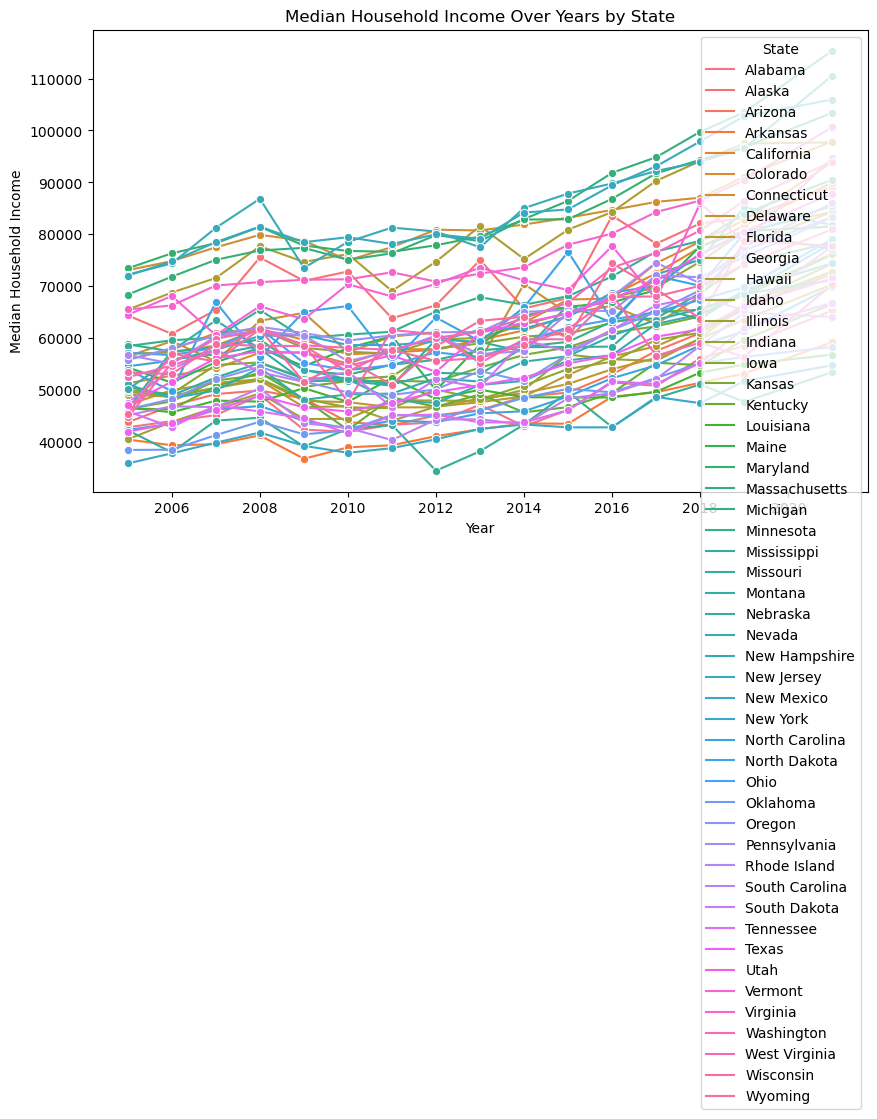

In [28]:
# Use seaborn to create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Median Household Income', hue='State', data=merged_df, marker='o')

# Customize the plot
plt.title('Median Household Income Over Years by State')
plt.xlabel('Year')
plt.ylabel('Median Household Income')
plt.legend(title='State')

# Show the plot
plt.show()

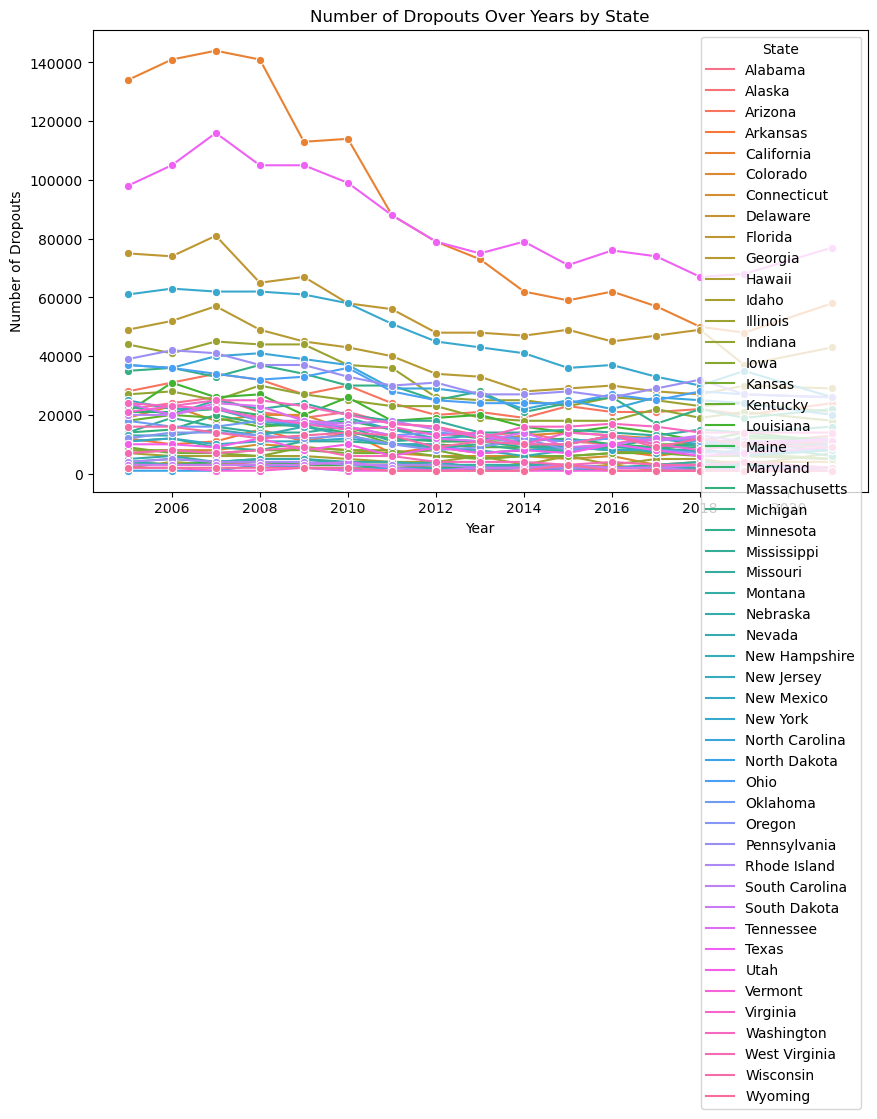

In [29]:
# Use seaborn to create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Number of Dropouts', hue='State', data=merged_df, marker='o')

# Customize the plot
plt.title('Number of Dropouts Over Years by State')
plt.xlabel('Year')
plt.ylabel('Number of Dropouts')
plt.legend(title='State')

# Show the plot
plt.show()

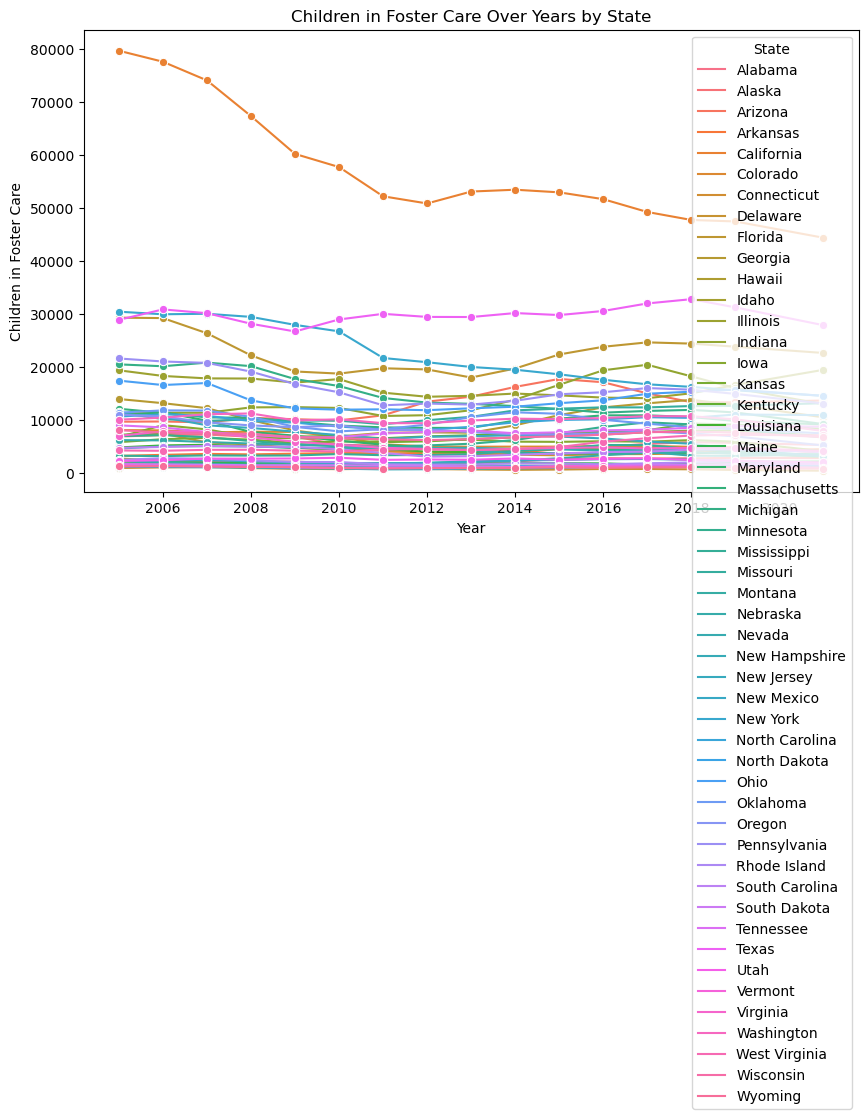

In [30]:
# Use seaborn to create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Children In Foster Care', hue='State', data=merged_df, marker='o')

# Customize the plot
plt.title('Children in Foster Care Over Years by State')
plt.xlabel('Year')
plt.ylabel('Children in Foster Care')
plt.legend(title='State')

# Show the plot
plt.show()

In [31]:
#create dataframes with averages of all states
nation_median_income = pd.DataFrame(median_household_income_df.groupby(by='Year')['Median Household Income'].mean())
nation_dropouts = pd.DataFrame(dropouts_df.groupby(by='Year')['Number of Dropouts'].mean())
nation_foster_children = pd.DataFrame(in_foster_df.groupby(by='Year')['Children In Foster Care'].mean())

In [32]:
#merge to single dataframe of national averages by year
merged_avg_income_dropouts_df = pd.merge(nation_median_income, nation_dropouts, on=['Year'])
merged_avg_df = pd.merge(merged_avg_income_dropouts_df, nation_foster_children, on= ['Year'])

In [33]:
#examine dataframe
merged_avg_df

,Median Household Income,Number of Dropouts,Children In Foster Care
Year,,,
2005,52419.0,22200.000000,10012.08
2006,53912.0,22920.000000,10002.82
2007,56727.0,23380.000000,9663.84
2008,58797.0,22360.000000,9016.58
2009,55750.0,20980.000000,8312.28
2010,54943.0,20020.000000,8025.16
2011,55227.0,17180.000000,7519.82
2012,56496.0,15480.000000,7486.30
2013,57647.0,14520.000000,7593.46


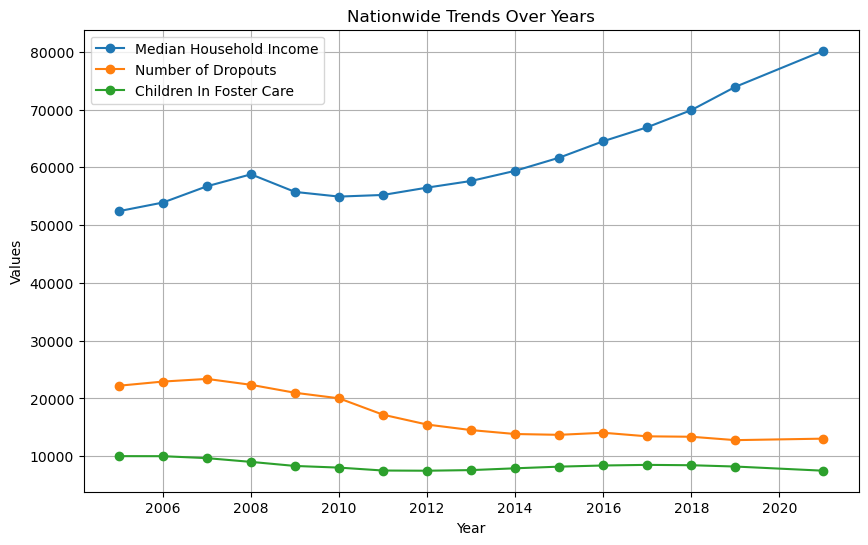

In [34]:
# Plotting nationwide averages
plt.figure(figsize=(10, 6))

# Plot Median Household Income
plt.plot(merged_avg_df.index, merged_avg_df['Median Household Income'], label='Median Household Income', marker='o')

# Plot Number of Dropouts
plt.plot(merged_avg_df.index, merged_avg_df['Number of Dropouts'], label='Number of Dropouts', marker='o')

# Plot Children In Foster Care
plt.plot(merged_avg_df.index, merged_avg_df['Children In Foster Care'], label='Children In Foster Care', marker='o')

# Customize the plot
plt.title('Nationwide Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\derek\AppData\Local\Temp\ipykernel_20744\910662594.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = merged_df.corr().round(2)


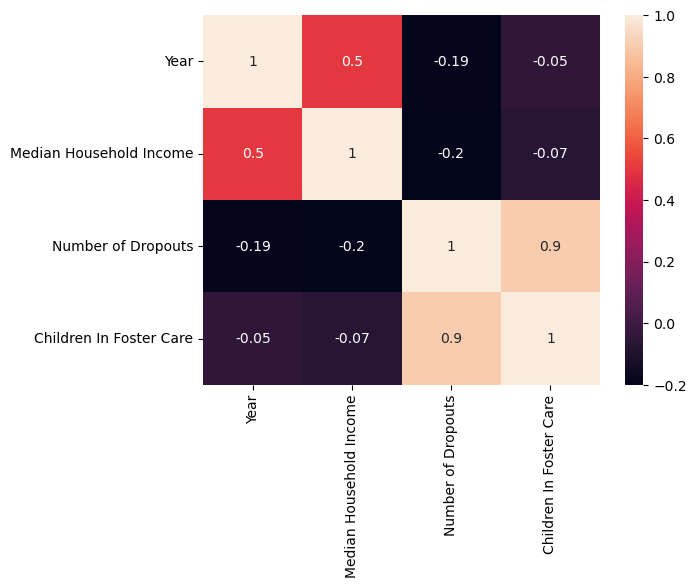

In [35]:
#look for correlations
matrix = merged_df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [36]:
#use prophet to make future projections
#convert dataframes to prophet format, ds and y as column headers

#must reset index so the year is the first column
merged_avg_prophet_df = merged_avg_df.reset_index()

#make dataframes
income_prophet_df = merged_avg_prophet_df[['Year', 'Median Household Income']]
dropouts_prophet_df = merged_avg_prophet_df[['Year', 'Number of Dropouts']]
in_foster_prophet_df = merged_avg_prophet_df[['Year', 'Children In Foster Care']]

#rename columns
income_prophet_df.columns = ['ds', 'y']
dropouts_prophet_df.columns = ['ds', 'y']
in_foster_prophet_df.columns = ['ds', 'y']

#check
income_prophet_df.head()

,ds,y
0,2005,52419.0
1,2006,53912.0
2,2007,56727.0
3,2008,58797.0
4,2009,55750.0


In [37]:
#create Prophet models
model_income = Prophet()
model_dropouts = Prophet()
model_in_foster = Prophet()

In [38]:
#fit
try:
    model_income.fit(income_prophet_df)
    model_dropouts.fit(dropouts_prophet_df)
    model_in_foster.fit(in_foster_prophet_df)
except:
    print("Models have already been fit")

16:44:45 - cmdstanpy - INFO - Chain [1] start processing
16:44:45 - cmdstanpy - INFO - Chain [1] done processing
16:44:45 - cmdstanpy - INFO - Chain [1] start processing
16:44:45 - cmdstanpy - INFO - Chain [1] done processing
16:44:45 - cmdstanpy - INFO - Chain [1] start processing
16:44:45 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
#create future timeseries data to predict onto
future_dates = pd.DataFrame({'ds': ['2022', '2023', '2024', '2025', '2026']})
future_dates['ds'] = pd.to_datetime(future_dates['ds'], format='%Y').dt.year
future_dates

,ds
0,2022
1,2023
2,2024
3,2025
4,2026


In [40]:
#predict
forecast_income = model_income.predict(future_dates)
forecast_dropouts = model_dropouts.predict(future_dates)
forecast_in_foster = model_in_foster.predict(future_dates)

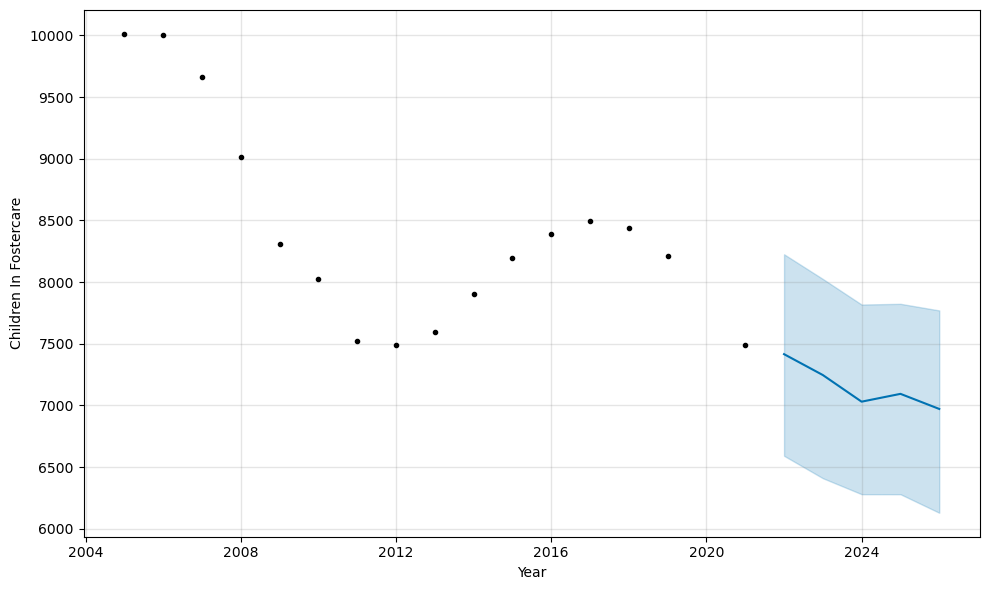

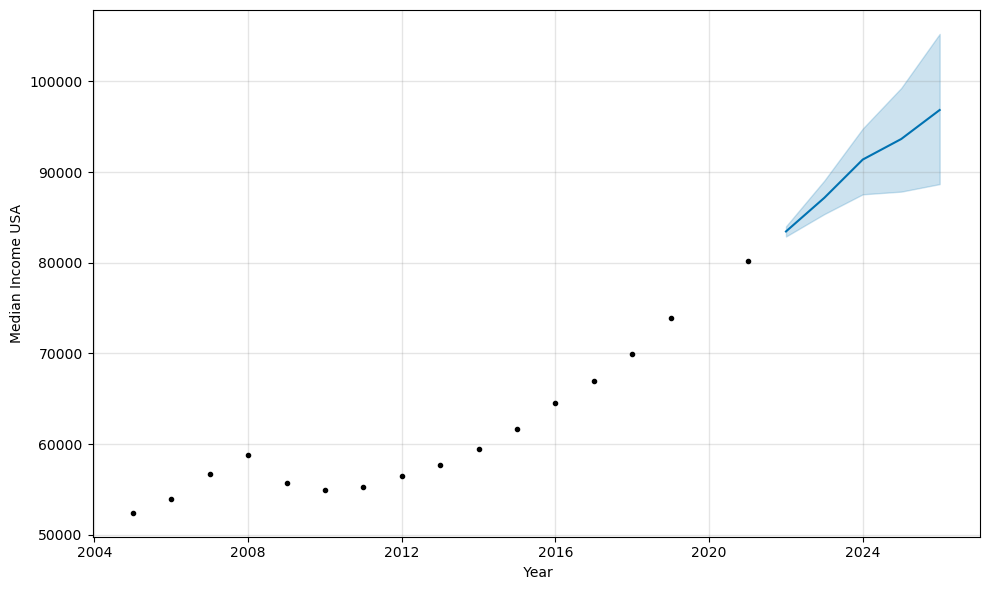

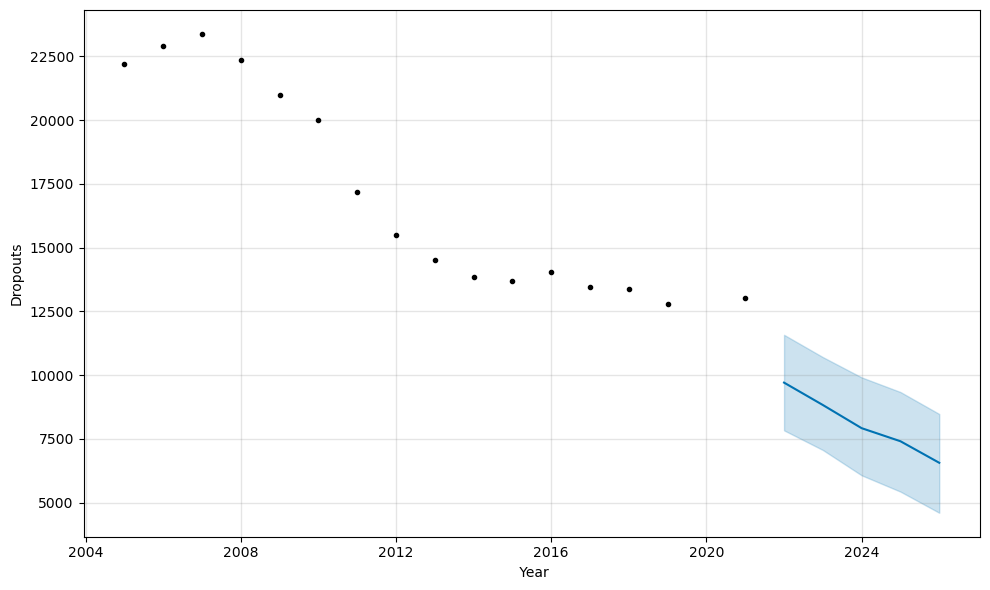

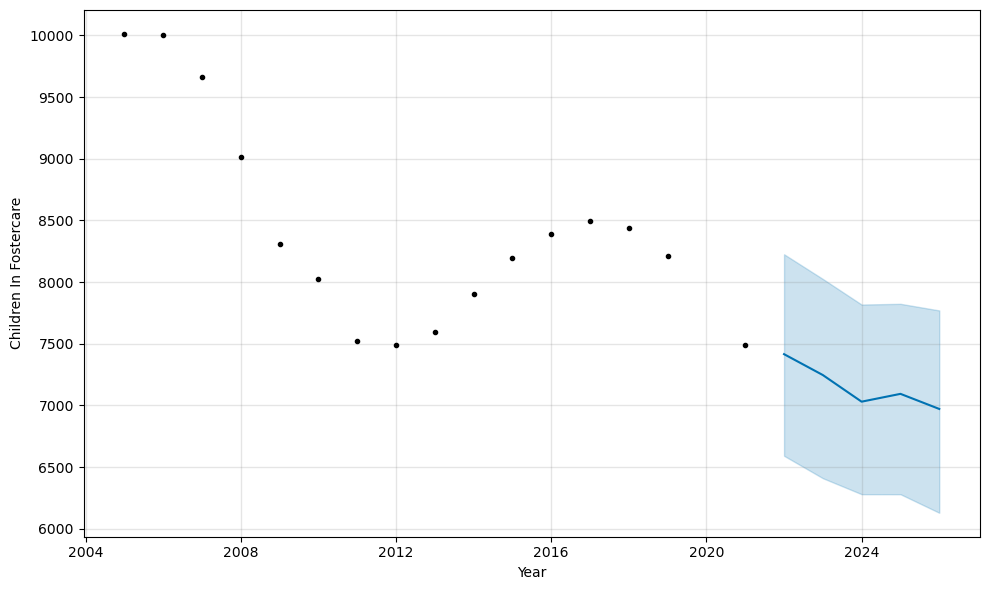

In [41]:
#plot
model_income.plot(forecast_income, xlabel =' Year', ylabel = 'Median Income USA')
model_dropouts.plot(forecast_dropouts, xlabel =' Year', ylabel = 'Dropouts')
model_in_foster.plot(forecast_in_foster, xlabel = 'Year', ylabel = 'Children In Fostercare')

In [42]:
merged_avg_df

,Median Household Income,Number of Dropouts,Children In Foster Care
Year,,,
2005,52419.0,22200.000000,10012.08
2006,53912.0,22920.000000,10002.82
2007,56727.0,23380.000000,9663.84
2008,58797.0,22360.000000,9016.58
2009,55750.0,20980.000000,8312.28
2010,54943.0,20020.000000,8025.16
2011,55227.0,17180.000000,7519.82
2012,56496.0,15480.000000,7486.30
2013,57647.0,14520.000000,7593.46


In [43]:
#we need to normalize the data into percent changes over time to be able to see correlations better

#use preprocessing.normalize from scikit learn to scale data by column
scaled_avg_data = preprocessing.normalize(merged_avg_df, axis=0)

#convert scaled data to pandas DataFrame
scaled_avg_df = pd.DataFrame(scaled_avg_data, columns=merged_avg_df.columns)



,Median Household Income,Number of Dropouts,Children In Foster Care
0,0.212611,0.316467,0.295798
1,0.218666,0.326731,0.295525
2,0.230084,0.333289,0.285510
3,0.238480,0.318748,0.266387
4,0.226121,0.299076,0.245579
5,0.222848,0.285391,0.237096
6,0.224000,0.244906,0.222166
7,0.229147,0.220672,0.221176
8,0.233815,0.206987,0.224342
9,0.240950,0.197293,0.233559


In [45]:
#set year as index
scaled_avg_df.set_index(merged_avg_df.index)

,Median Household Income,Number of Dropouts,Children In Foster Care
Year,,,
2005,0.212611,0.316467,0.295798
2006,0.218666,0.326731,0.295525
2007,0.230084,0.333289,0.285510
2008,0.238480,0.318748,0.266387
2009,0.226121,0.299076,0.245579
2010,0.222848,0.285391,0.237096
2011,0.224000,0.244906,0.222166
2012,0.229147,0.220672,0.221176
2013,0.233815,0.206987,0.224342


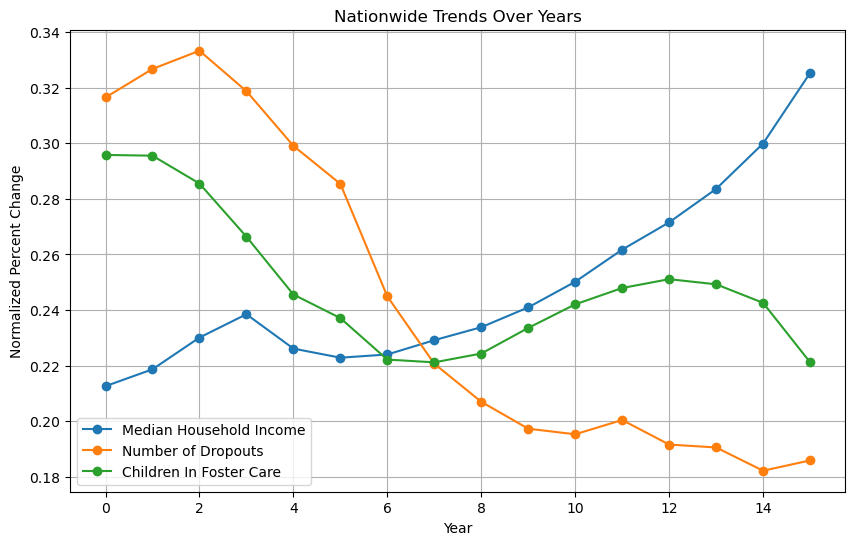

In [52]:
# Plotting normalized nationwide averages
plt.figure(figsize=(10, 6))

# Plot Median Household Income
plt.plot(scaled_avg_df.index, scaled_avg_df['Median Household Income'], label='Median Household Income', marker='o')

# Plot Number of Dropouts
plt.plot(scaled_avg_df.index, scaled_avg_df['Number of Dropouts'], label='Number of Dropouts', marker='o')

# Plot Children In Foster Care
plt.plot(scaled_avg_df.index, scaled_avg_df['Children In Foster Care'], label='Children In Foster Care', marker='o')

# Customize the plot
plt.title('Nationwide Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Normalized Percent Change')
plt.legend()
plt.grid(True)
#must savefig before .show() otherwise saved image will be blank
plt.savefig('Normalized Trends.png')
plt.show()

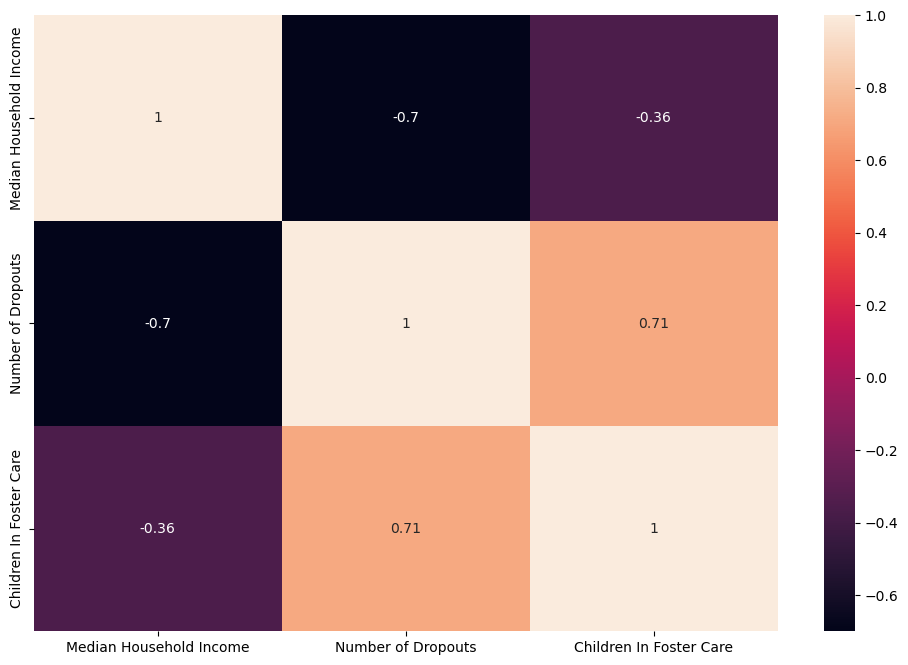

In [54]:
#look for correlations
matrix_scaled = scaled_avg_df.corr().round(2)

plt.figure(figsize=(12, 8))
sns.heatmap(matrix_scaled, annot=True)
plt.savefig('Correlations.png')
plt.show()

In [44]:
pd.__version__

'1.5.3'